# Calculation of melting temperature

In [3]:
from pyiron_workflow import Workflow
from calphy_nodes.calphy.calphy import SolidFreeEnergyWithTemperature, LiquidFreeEnergyWithTemperature, InputClass, CalculatePhaseTransformationTemperature
from structure_nodes.structure.build import Bulk
from structure_nodes.structure.transform import Repeat
from pyironflow.pyironflow import PyironFlow

Set up inputs for solid and liquid

Compose workflow

In [2]:
wf = Workflow("tm_s3")

wf.solid_inp = InputClass(temperature=800, 
                temperature_stop=1100,
                pressure=0,
                n_equilibration_steps=2500,
                n_switching_steps=2500,
                cores = 2,
                )
wf.liquid_inp = InputClass(temperature=800, 
                temperature_stop=1100,
                pressure=0,
                n_equilibration_steps=2500,
                n_switching_steps=2500,
                cores = 2,
                )

wf.unit_cell = Bulk("Al", cubic=True)
wf.struct = Repeat(wf.unit_cell, repeat_scalar=3)
wf.solid = SolidFreeEnergyWithTemperature(wf.solid_inp, 
                                    wf.struct, 
                                    '2009--Mendelev-M-I--Al-Mg--LAMMPS--ipr1')
wf.liquid = LiquidFreeEnergyWithTemperature(wf.liquid_inp, 
                                    wf.struct, 
                                    '2009--Mendelev-M-I--Al-Mg--LAMMPS--ipr1')
wf.melting_temperature = CalculatePhaseTransformationTemperature(wf.solid.outputs.temperature, 
                                                                wf.solid.outputs.free_energy,
                                                                wf.liquid.outputs.temperature,
                                                                wf.liquid.outputs.free_energy)

Run the workflow

/home/srmnitc/miniforge3/envs/dpg2025/lib/python3.11/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(
[cmleo26:508360] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
[cmleo26:508359] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
[cmleo26:508376] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
[cmleo26:508377] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
[cmleo26:508393] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or director

{'melting_temperature__phase_transition_temperature': 1022.0}

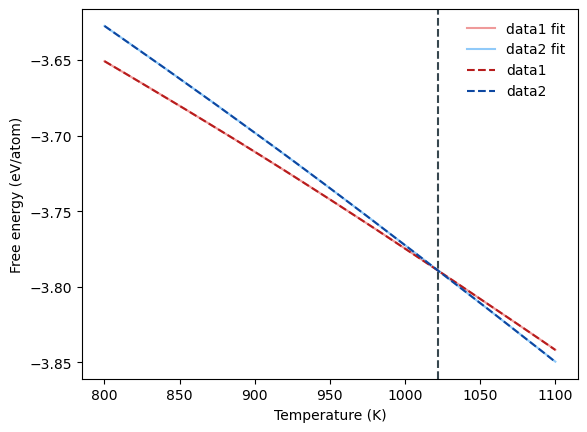

In [3]:
wf.run()

In [6]:
pf = PyironFlow([wf], root_path='.')

In [7]:
pf.gui